In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
print(data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [6]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

<Axes: >

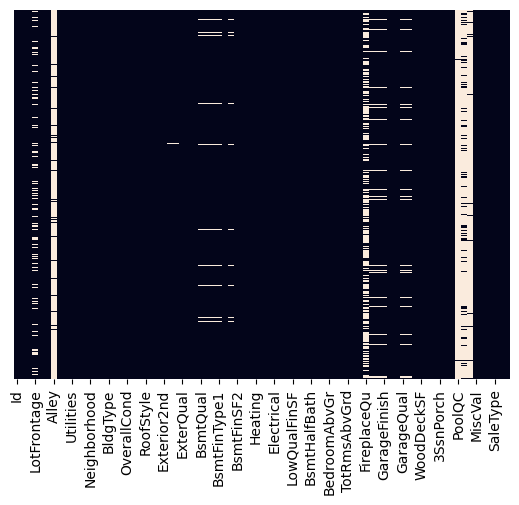

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [8]:
LotFrontage_mean=data['LotFrontage'].mean()

In [9]:
data['LotFrontage'].fillna(LotFrontage_mean,inplace=True)

<Axes: >

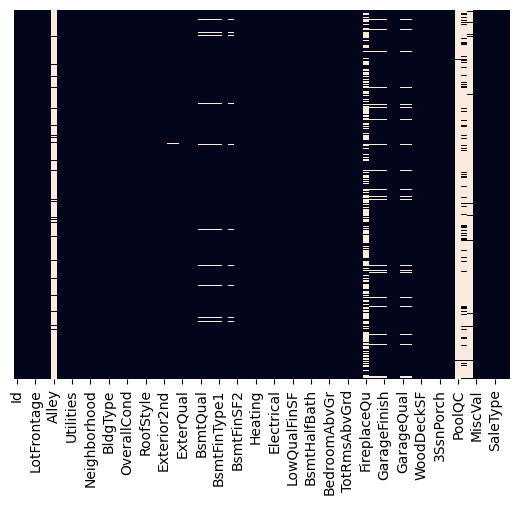

In [10]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [11]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Category' column
data['Exterior2nd'] = label_encoder.fit_transform(data['Exterior2nd'])
data['Alley'] = label_encoder.fit_transform(data['Alley'])
data['BsmtQual'] = label_encoder.fit_transform(data['BsmtQual'])
data['BsmtFinType1'] = label_encoder.fit_transform(data['BsmtFinType1'])
data['BsmtFinSF2'] = label_encoder.fit_transform(data['BsmtFinSF2'])
data['FireplaceQu'] = label_encoder.fit_transform(data['FireplaceQu'])
data['GarageQual'] = label_encoder.fit_transform(data['GarageQual'])
data['PoolQC'] = label_encoder.fit_transform(data['PoolQC'])
data['BsmtCond']=label_encoder.fit_transform(data['BsmtCond'])
data['GarageCond']=label_encoder.fit_transform(data['GarageCond'])
data['GarageFinish']=label_encoder.fit_transform(data['GarageFinish'])
data['FireplaceQu']=label_encoder.fit_transform(data['FireplaceQu'])
data['BsmtFinType2']=label_encoder.fit_transform(data['BsmtFinType2'])
data['Fence']=label_encoder.fit_transform(data['Fence'])
data['BsmtExposure']=label_encoder.fit_transform(data['BsmtExposure'])


# Print the updated DataFrame
print(data)



        Id  MSSubClass MSZoning  LotFrontage  LotArea Street  Alley LotShape  \
0        1          60       RL         65.0     8450   Pave      2      Reg   
1        2          20       RL         80.0     9600   Pave      2      Reg   
2        3          60       RL         68.0    11250   Pave      2      IR1   
3        4          70       RL         60.0     9550   Pave      2      IR1   
4        5          60       RL         84.0    14260   Pave      2      IR1   
...    ...         ...      ...          ...      ...    ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      2      Reg   
1456  1457          20       RL         85.0    13175   Pave      2      Reg   
1457  1458          70       RL         66.0     9042   Pave      2      Reg   
1458  1459          20       RL         68.0     9717   Pave      2      Reg   
1459  1460          20       RL         75.0     9937   Pave      2      Reg   

     LandContour Utilities  ... PoolAre

<Axes: >

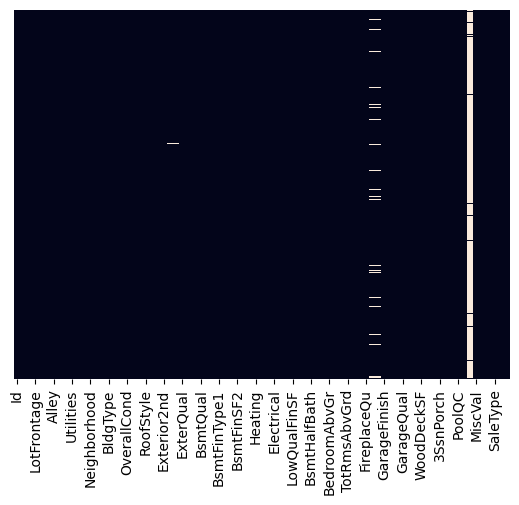

In [12]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [13]:
data=pd.DataFrame(data)


In [14]:
del data["PoolArea"]

In [15]:
del data["LandSlope"]

In [16]:
del data["MoSold"]

In [17]:
del data["MiscVal"]

In [18]:
del data["BsmtFinSF2"]

In [19]:
del data["Condition2"]

In [20]:
del data["Street"]

In [21]:
del data["GarageYrBlt"]

In [22]:

del data['Utilities']

In [23]:
del data["3SsnPorch"]

In [24]:
del data["YrSold"]

In [25]:
del data["MiscFeature"]

In [26]:
del data["RoofMatl"]

In [27]:
MasVnrType_mean=data['MasVnrType'].mode()

In [28]:
data['MasVnrType'].fillna(MasVnrType_mean,inplace=True)

In [29]:
del data["GarageType"]

In [30]:
del data["MasVnrArea"]

In [31]:
del data["MasVnrType"]

In [32]:
del data["Functional"]

<Axes: >

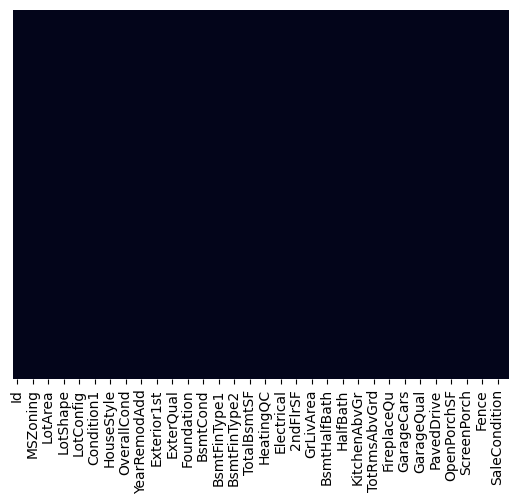

In [33]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [34]:
data.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,Fence,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
